### Importing Libraries for Data Extraction

In [1]:
# Libraries
import pandas as pd

import praw

### Data Extraction Part 1
#### We'll be going through the hot, new, controversial, top of Reddit India and collect as much data as we can. For this we'll be using the praw library which is the Python Reddit API Wrapper. 

In [2]:
# Creating a reddit instance
reddit = praw.Reddit(client_id = '2d0GPjug_U7kaQ', client_secret = 'slwg95MGliJJAFwnh6kK7XziIY8', user_agent = 'Test_API', username = "Shaurya_L", password = "123456")

In [3]:
# Using the reddit instance to create a subreddit instance
subreddit_india = reddit.subreddit('india')

In [4]:
reddit_posts = []


for post in subreddit_india.hot(limit = 1000):
    reddit_posts.append([post.title, post.score, post.id, post.url, post.num_comments, post.selftext, post.link_flair_text])
posts = pd.DataFrame(reddit_posts, columns = ['Post_Title', 'Post_Score', 'Post_ID', 'Post_URL', 'Number_of_Comments_on_Post', 'Post_Body', 'Post_Flair'])


for post in subreddit_india.new(limit = 1000):
    if post.id not in posts['Post_ID'].unique():
        reddit_posts.append([post.title, post.score, post.id, post.url, post.num_comments, post.selftext, post.link_flair_text])
posts = pd.DataFrame(reddit_posts, columns = ['Post_Title', 'Post_Score', 'Post_ID', 'Post_URL', 'Number_of_Comments_on_Post', 'Post_Body', 'Post_Flair'])


for post in subreddit_india.controversial(limit = 1000):
    if post.id not in posts['Post_ID'].unique():
        reddit_posts.append([post.title, post.score, post.id, post.url, post.num_comments, post.selftext, post.link_flair_text])
posts = pd.DataFrame(reddit_posts, columns = ['Post_Title', 'Post_Score', 'Post_ID', 'Post_URL', 'Number_of_Comments_on_Post', 'Post_Body', 'Post_Flair'])


for post in subreddit_india.top(limit = 1000):
    if post.id not in posts['Post_ID'].unique():
        reddit_posts.append([post.title, post.score, post.id, post.url, post.num_comments, post.selftext, post.link_flair_text])
posts = pd.DataFrame(reddit_posts, columns = ['Post_Title', 'Post_Score', 'Post_ID', 'Post_URL', 'Number_of_Comments_on_Post', 'Post_Body', 'Post_Flair'])


# post.title - Title of the Reddit post
# post.score - The difference b/w the number of upvotes and downvotes on a particular post
# post.id - Unique id given to each Reddit post
# post.url - URL to directly refer to the Reddit post
# post.num_comments - Number of comments on the Reddit post
# post.selftext - Body of the Reddit post
# post.link_flair_text - Flair of the Reddit post like Politics, AskIndia, Economy, etc

In [5]:
# Converting posts to a .csv file
posts.to_csv('posts_data.csv')

In [6]:
# Storing posts_data in a dataframe df
posts_data = pd.read_csv('posts_data.csv')

In [7]:
# Printing first 5 rows from posts_data
posts_data.head()

,Unnamed: 0,Post_Title,Post_Score,Post_ID,Post_URL,Number_of_Comments_on_Post,Post_Body,Post_Flair
0,0,Coronavirus (COVID-19) Megathread - News and U...,106,g1zi21,https://www.reddit.com/r/india/comments/g1zi21...,895,###[Covid-19 Fundraisers & Donation Links](htt...,Coronavirus
1,1,"Announcing r/IndiaMeme, our own sub for memes ...",267,fzub9j,https://www.reddit.com/r/india/comments/fzub9j...,75,HELLO YOU NICE PEOPLE. WE GOT REALLY TIRED OF ...,Announcement
2,2,Mumbai: Delivery boy held for spitting on Mani...,877,g3hqbs,https://timesofindia.indiatimes.com/city/mumba...,77,NaN,Coronavirus
3,3,COVID-19: Doctors worry as India’s West Bengal...,487,g3iku3,https://gulfnews.com/world/asia/india/covid-19...,42,NaN,Coronavirus
4,4,Infected pizza boy: Online food delivery order...,383,g3iu9p,https://timesofindia.indiatimes.com/business/i...,77,NaN,Coronavirus


In [8]:
# Extracting unique values from Post_Flair column
posts_data['Post_Flair'].unique()

array(['Coronavirus', 'Announcement', 'Business/Finance', 'Non-Political',
       'Politics', 'CAA-NRC-NPR', 'Policy/Economy', 'AskIndia', 'Old',
       'Science/Technology', 'Food', 'Photography', nan, 'Scheduled',
       'Sports', '| Repost |', '| Not specific to India |',
       'Post link Directly', '[R]eddiquette', 'Misleading', 'Moderated',
       'Policy', 'Policy & Economy', 'AMA Concluded',
       'Original Content :)', 'Unverified', 'Meta', 'Politics [OLD]',
       '[Editorialised]', 'Science & Technology', 'Demonetization',
       'CAA-NRC', 'Entertainment', '/r/all', 'r/all',
       'Politics [Megathread]', 'Totally real', 'Zoke Tyme',
       'Official Sadness Thread', 'Politics -- Source in comments',
       'Policy/Economy -2017 Article ', 'Original Comics',
       'Misleading Headline ', 'OC', 'On Internet Shutdowns', 'Lifehacks',
       'AMA', '40 Martyrs', 'Goal Achieved!!!'], dtype=object)

In [9]:
# Number of unique flairs
posts_data['Post_Flair'].nunique()

48

In [10]:
# Printing data shape
posts_data.shape

(2827, 8)

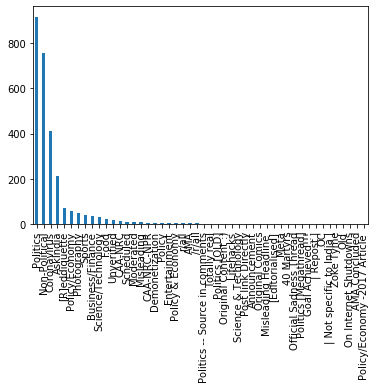

In [12]:
# Plotting bar chart for unique flairs in Post_Flair column and their count 
pd.value_counts(posts_data['Post_Flair']).plot.bar()

#### There are quite a few problems with the data collected. Following are the problems encountered:
 - A lot of random flairs were encountered. To resolve the problem, some flairs were removed or 2 or more flairs were combined with each other.
 - Data from 2827 posts was collected. But as seen from above bar plot, data is very unevenly divided. Some flairs have more than 800 instances while some flairs have negligible number of instances as seen from the above bar plot.  

#### Some flairs have been completely removed while other flairs were converted to a known flair. Following is the list of flairs that would be used:
 - AMA - AMA Concluded, Unverified, AMA
 - Policy/Economy - Policy, Demonitization, Policy & Economy, Policy/Economy -2017 Article, Policy/Economy
 - Non Political - Non-Political, Entertainment, Misleading, /r/all, r/all  
 - Science/Technology - Science & Technology, Science/Technology
 - Politics - Politics, CAA-NRC-NPR, Politics [OLD], Politics -- Source in comments,  Politics [Megathread], CAA-NRC 
 - Coronavirus - Coronavirus
 - AskIndia - AskIndia
 - Business/Finance - Business/Finance
 - Food - Food
 - Photography - Photography
 - Sports - Sports
 - [R]eddiquette - [R]eddiquette

In [13]:
k = 0
for reddit_flair in posts_data['Post_Flair']:
    if reddit_flair == 'AMA Concluded' or reddit_flair == 'Unverified' or reddit_flair == 'AMA':
        posts_data['Post_Flair'][k] = 'AMA' 
    k = k + 1


k = 0
for reddit_flair in posts_data['Post_Flair']:
    if reddit_flair == 'Policy' or reddit_flair == 'Demonetization' or reddit_flair == 'Policy & Economy' or  reddit_flair == 'Policy/Economy -2017 Article ' or reddit_flair == 'Policy/Economy':
        posts_data['Post_Flair'][k] = 'Policy/Economy' 
    k = k + 1


k = 0
for reddit_flair in posts_data['Post_Flair']:
    if reddit_flair == 'Non-Political' or reddit_flair == 'Entertainment' or reddit_flair == 'Misleading' or reddit_flair == '/r/all' or reddit_flair == 'r/all':
        posts_data['Post_Flair'][k] = 'Non Political' 
    k = k + 1


k = 0
for reddit_flair in posts_data['Post_Flair']:
    if reddit_flair == 'Science & Technology' or reddit_flair == 'Science/Technology':
        posts_data['Post_Flair'][k] = 'Science/Technology' 
    k = k + 1


k = 0
for reddit_flair in posts_data['Post_Flair']:
    if reddit_flair == 'Politics' or reddit_flair == 'CAA-NRC-NPR' or reddit_flair == 'Politics [OLD]' or reddit_flair == 'Politics -- Source in comments' or reddit_flair == 'Politics [Megathread]' or reddit_flair == 'CAA-NRC':
        posts_data['Post_Flair'][k] = 'Politics' 
    k = k + 1


reddit_flair_list = ['AMA', 'Policy/Economy', 'Non Political', 'Science/Technology', 'Politics', 'Coronavirus', 'AskIndia', 'Business/Finance', 'Food', 'Photography', 'Sports', '[R]eddiquette']

# Removing the unwanted flairs and storing the updated data into a new dataframe
posts_data_new = posts_data[posts_data.Post_Flair.isin(reddit_flair_list)]

/Users/shauryaluthra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/shauryaluthra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/shauryaluthra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users

In [14]:
posts_data_new.shape

(2668, 8)

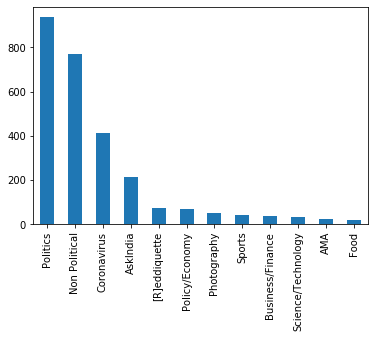

In [15]:
pd.value_counts(posts_data_new['Post_Flair']).plot.bar()

#### Even after removing some data and combining some flairs, the plot shows that data is still unbalanced and very unevenly divided. Some flairs have more than 800 instances while some flairs have less number of instances. Now we'll try some other method of data extraction.

### Data Extraction Part 2

#### For this we'll iterate through the reddit posts and collect data for the specific flairs. 200 data points have been taken from each flair.

In [48]:
reddit = praw.Reddit(client_id = '2d0GPjug_U7kaQ', client_secret = 'slwg95MGliJJAFwnh6kK7XziIY8', user_agent = 'Test_API', username = "Shaurya_L", password = "123456")
reddit_flair_list=['AMA', 'Policy/Economy', 'Non Political', 'Science/Technology', 'Politics', 'Coronavirus', 'AskIndia', 'Business/Finance', 'Food', 'Photography', 'Sports', '[R]eddiquette']
subreddit = reddit.subreddit('india')
data_cols = {"Post_Flair":[], "Post_Title":[], "Post_ID":[], "Post_Score":[], "Post_URL":[], "Post_Body":[], "Number_of_Comments_on_Post": [], "Post_Comments": []}

In [8]:
for reddit_flair in reddit_flair_list:
    
    get_subreddits = subreddit.search(reddit_flair, limit = 200)
  
    for submission in get_subreddits:
        data_cols["Post_Flair"].append(flair)
        data_cols["Post_Title"].append(submission.title)
        data_cols["Post_ID"].append(submission.id)
        data_cols["Post_Score"].append(submission.score)
        data_cols["Post_URL"].append(submission.url)
        data_cols["Post_Body"].append(submission.selftext)
        data_cols["Number_of_Comments_on_Post"].append(submission.num_comments)
    
    submission.comments.replace_more(limit = None)
    comment = ''
    for top_comment in submission.comments:
        comment = comment + ' ' + top_comment.body
    data_cols["Post_Comments"].append(comment)
    
# With a submission object we can interact with the CommentForest through the submission’s comments attribute. A 
# CommentForest is a list of top-level comments each of which contains a CommentForest of replies.

In [9]:
# Storing the extracted data as a .csv file
data = pd.DataFrame(data_cols)
data.to_csv('Final Reddit India Data.csv', index = False)

In [10]:
# Reading data
df = pd.read_csv('Final Reddit India Data.csv')

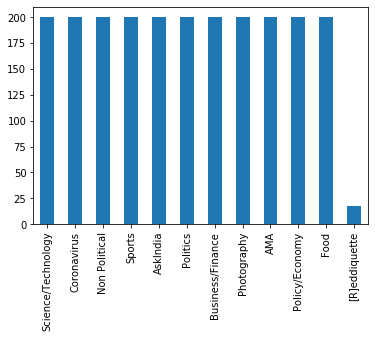

In [11]:
pd.value_counts(df['Post_Flair']).plot.bar()

#### Now the data is more balanced as compared to the previous method of data extraction

In [12]:
df.shape

(2218, 8)